# Q1

Consider the probability distribution below:

$$P(x) = e^{0.4(x-0.4)^2 - 0.08 x^4}$$


## (a)
Write a function to implement Metropolice algorithm to generate random samples that have the same PDF as the given formula.

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

In [272]:
def P(x):  #target density
    return np.exp((0.4 * (x-0.4) ** 2)-(0.08 * x ** 4))

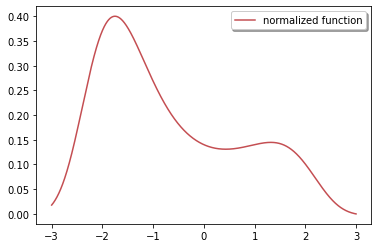

In [273]:
# plot the target density
x_vals = np.linspace(-3, 3, 10000)
y_vals = (P(x_vals))
norm = [(float(i)-min(y_vals))/(max(y_vals)-min(y_vals)) for i in y_vals]
y_norm = np.asarray(norm) * (0.4)
plt.figure(1)
plt.plot(x_vals, y_norm, 'r', label='normalized function')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [274]:
# implementing metropolis-hastings
x0 = 0
x = x0
samples = []
for i in range(100000):
    x_candidate = np.random.normal(x,1)
    accept_prob = P(x_candidate)/P(x)
    if np.random.uniform(0, 1) < accept_prob:
        x = x_candidate
    samples.append(x)
burn_in = 10000
samples = np.array(samples[burn_in:])

## (b)
Plot the function alongside with the histogram of the generated sample. Do they match? If not, what shall be done here?

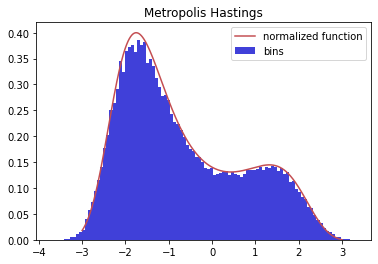

In [276]:
plt.hist(samples, bins=100, histtype='bar', color='mediumblue', alpha=0.75, label='bins', density=True)
plt.plot(x_vals, y_norm, 'r', label='normalized function')
plt.title('Metropolis Hastings')
plt.legend(loc='upper right')
plt.show()

## (c)
Generate data using Metropolice algorithm with four different values for step size (0.1, 0.5, 1 and 2) and plot the autocorrelation function for each case. which one becomes uncorrelated sooner?

In [277]:
def Metropolice(step,n):
  x0 = 0
  x = x0
  samples = []
  for i in range(n):
    x_candidate = np.random.normal(x,step)
    accept_prob = P(x_candidate)/P(x)
    if np.random.uniform(0, 1) < accept_prob:
        x = x_candidate
        samples.append(x)
  return np.array(samples)

In [278]:
from statsmodels.graphics.tsaplots import plot_acf

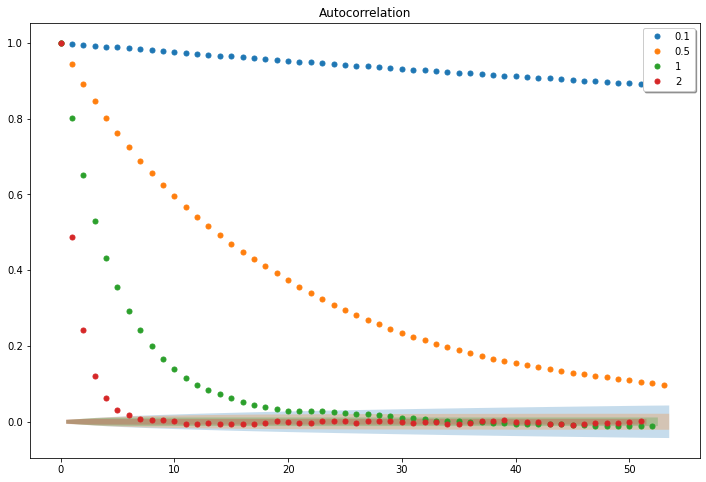

In [279]:
%matplotlib inline
plt.figure(figsize=(12,8))
for i in [0.1, 0.5, 1, 2]:
    sample_plot = Metropolice(i,200000)
    plot_acf(sample_plot,ax = plt.subplot(1,1,1),label= str(i),use_vlines = False)
plt.legend(loc='upper right', shadow=True)
plt.show()

# Q2: Variational Monte Carlo

Imagine we have a quantum harmonic osscilator were the Hamiltonian is
$$\hat{H} = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2 $$

In oreder to solve this, we guess a wave function, and then using Monte Carlo methods, we try to find the lowest energy state.

Now imagine our wave function is

$$ \psi \propto e^{-\lambda x^2} $$

Then the local energy of the system at each point would be

$$ E_L = \frac{H \psi}{\psi} = \lambda + x^2 (\frac{1}{2} - 2\lambda^2) $$

## (a)

Write a Metropolice algorithm to generate values for $x$ as a function of $\lambda$. Then plot the PDF alongside with the analitycal function for $P(x) = \psi^2(x)$ to confirm that they match.

P.S. in quantum mechanics, the probability function is always given as $\psi^2$.

In [280]:
def Prob(x, la):
    return np.exp(-2 * la * x**2)

In [281]:
def Prob_new(x):
  return Prob(x,0.5)

In [282]:
def metropolice(n):
  x0 = 0
  x = x0
  sample_x = []
  for i in range(n):
    x_candidate = np.random.normal(x,1)
    acceptence = Prob_new(x_candidate)/Prob_new(x)
    if np.random.uniform(0, 1) < acceptence:
      x = x_candidate
      sample_x.append(x)

  return np.array(sample_x)

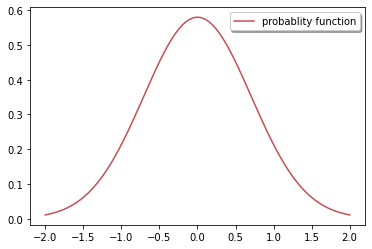

In [283]:
x = np.linspace(-2,2,1000)
y = Prob_new(x) * (0.58)
plt.plot(x, y, 'r', label='probablity function')
plt.legend(loc='upper right', shadow=True)
plt.show()

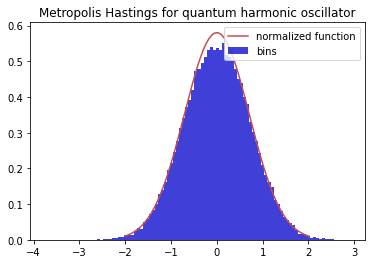

In [284]:
sample1_plot = metropolice(100000)
plt.hist(sample1_plot , bins=100, histtype='bar', color='mediumblue', alpha=0.75, label='bins', density=True)
plt.plot(x, y, 'r', label='normalized function')
plt.title('Metropolis Hastings for quantum harmonic oscillator')
plt.legend(loc='upper right')
plt.show()

## (b)

Write two functions to calculate the expectation value $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ as a function of $\lambda$.

In [285]:
def energy(la,x):
  return la + ((x ** 2) * (0.5 - 2 * la ** 2))

In [286]:
n = 500
def expected_E(la):
    x = metropolice(n)
    E = la + ((x ** 2) * (0.5 - 2 * la ** 2))
    return np.mean(E)
v_expected_E = np.vectorize(expected_E)

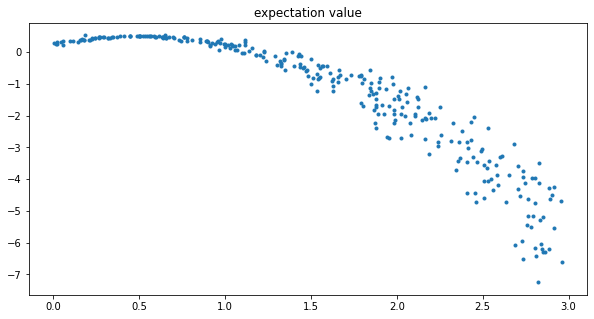

In [287]:
lenght = np.random.uniform(0, 3, 300)
plt.figure(figsize=(10, 5))
E = v_expected_E(lenght)
plt.title('expectation value')
plt.plot(lenght, E,'.')

In [288]:
def variance_E(la):
    x2 = metropolice(1000)
    E = la + ((x ** 2) * (0.5 - 2 * la ** 2))
    return np.var(E)
v_variance_E = np.vectorize(variance_E)

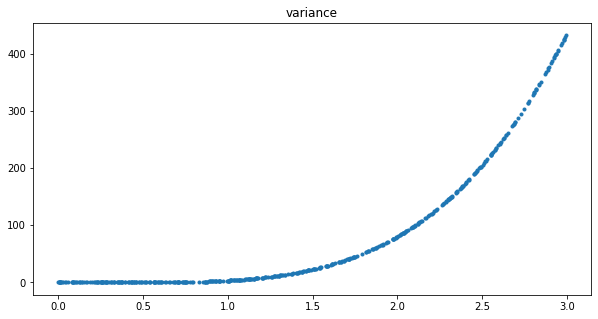

In [289]:
lenght = np.random.uniform(0, 3, 500)
plt.figure(figsize=(10, 5))
E = v_variance_E(lenght)
plt.title('variance')
plt.plot(lenght, E,'.')

## (d)

What's the sinificance of $\sigma^2$? Explain in a few lines in Farsi or English.

This quantity, also called standard deviation, is very important because it measures the amount of data scattered around the desired quantity. The wider the graph, the more the data deviates from the desired value, and conversely, the narrower the graph, the more accurate the data.

# Importance sampling

A frequently used method is Importance Sampling. In this method, a proxy distribution is introduced to sample random numbers from any distribution. In most cases, we choose a well-known distribution such as Gaussian distribution, uniform distribution as a proxy distribution. The main concept of this method can be simply written in the following form, where q(x) is a proxy distribution.


With Importance Sampling, instead of generating random numbers from p(x), we choose i.i.d samples ${x_i} (i=1,2,…,n)$ from a proxy distribution q(x) and approximate the integration value with the following calculation. Here, p(x)/q(x) is called importance of the sampling.

Now, let’s use a Laplace distribution’ variance calculation as an example.
Consider f(x)=x² and a probability density function p(x)=1/2 Exp(-|x|). The distribution with density function like p(x) is called Laplace distribution.
If we choose a uniform distribution as a proxy distribution, the variance of the Laplace distribution can be approximately calculated by

With paper and a pencil, we can easily calculate the Var[x]. The value of this calculation is 2. Now confirm the result of the Importance Sampling method.

In [290]:
def importance_sampling(x,y,n):
  sample = np.random.uniform(x,y,10**5)
  importance = np.mean(sample ** 2 * np.exp(-np.abs(sample))) / 2*(y-x)
  return importance

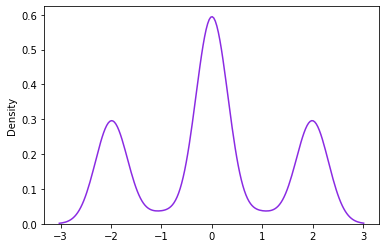

In [291]:
s = []
n = 100
for x in range(-100,100,5):
  for y in range(-100,100,5):
    data = importance_sampling(x,y,n)
    s.append(data)

sns.kdeplot(s,color ='blueviolet')

# Inverse Transform Sampling

In Inverse Transform Sampling method, we use a random number u generated from a 1-dimensional uniform distribution to generate a random number x of any 1-dimensional probability density function p(x). In this case, we use the inverse function of the cumulative distribution function of p(x). If the cumulative distribution function of p(x) is P(x), then the inverse function of u=P(x) is x =P^-1 (u). Now, $x = P^-1 (u)$ has p(x) as probability density function on [0,1]. Therefore, with n samples from uniform distribution on [0,1] ${u_i} (i=1,2,…,n)$, we can generate n sample of p(x) distribution ${x_i} (i=1,2,…,n)$ by calculate $x_i = P^{-1}(u_i)$.

Again, let's consider the Laplace distribution’s variance calculation as an example. This time we directly generate random numbers (samples) from the Laplace distribution’s probability density function using the Inverse Transform Sampling method. With these random numbers, we will again recalculate the approximated value of Var[x].

Now check the result of this method.

In [292]:
def inverse_func(u):
  return -np.sign(u - 0.5) * np.log(1 - 2 * np.abs(u - 0.5))
v_inverse_func = np.vectorize(inverse_func)

In [293]:
sample = np.random.uniform(0,1,10**5)
variance_s = np.var(inverse_func(sample))
lap = np.random.laplace(0,1,10**5)
variance_l = np.var(lap)
print('variance with Inverse Transform Sampling :',variance_s)
print('variance with directly used of Laplace distribution :', variance_l)

variance with Inverse Transform Sampling : 2.0127934364094955
variance with directly used of Laplace distribution : 2.006996598036819


In [294]:
import seaborn as sns

Text(0.5, 1.0, 'laplace distribution')

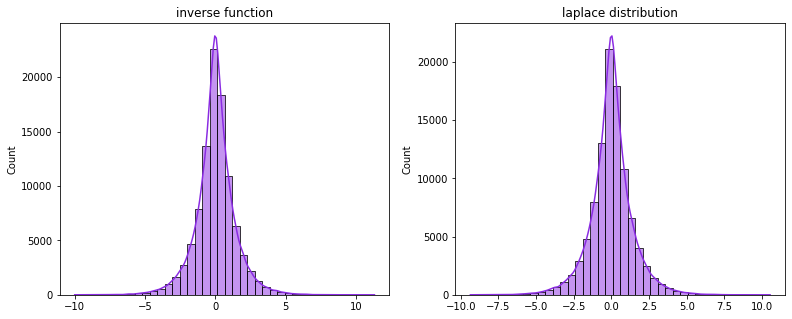

In [295]:
plt.figure(figsize = (13,5))

plt.subplot(121)
sns.histplot(inverse_func(sample), bins = 40,kde = True, color ='blueviolet');
plt.title('inverse function')

plt.subplot(122)
sns.histplot(lap, bins = 40,kde = True,color ='blueviolet');
plt.title('laplace distribution')


As can be seen from the graphs, these two distribution functions are perfectly compatible.

# Rejection Sampling 

The idea in Rejection Sampling is to use a proxy distribution (Gaussian or uniform distribution, etc.) called q(x) to generate a random number and use another uniform distribution to evaluate the generated sample whether or not to accept it as a sample generated from p(x). With this method, we can also generate random numbers from a higher dimensional distribution.

As preparation in generating random numbers with this method, we need to know a finite value of L where max[p(x)/q(x)] < L. Here, q(x) is a proxy distribution.

First, we generate a random number x’ from a proxy distribution q(x). This x’ is called a proposal point.<br>
Next, generate a random number v from a uniform distribution on [0, L]. This v will be used to evaluate the proposal point, whether to be fine considering generated from p(x).<br>
If v ≤ p(x’)/q(x’), then x’ is accepted as a random number generated by p(x), else, x’ is rejected.
The algorithm in generating n random numbers with Rejection Sampling is

Now use rejection sampling method to evaluate the variance of Laplace Distribution.

In [296]:
def p(x):
  return (1/2) * np.exp(-np.abs(x)) 

In [297]:
def rejection_sampling(n,l):
    sample = []
    for i in range(n): 
      Q = np.random.uniform(-l,l)
      v = np.random.uniform(0, l)
      if v <= 2 * l * p(Q):
        sample.append(Q)
    return np.array(sample)

In [298]:
variance_s2 = np.var(rejection_sampling(10**5,10))
lap2 = np.random.laplace(0,1,10**5)
variance_l2 = np.var(lap2)
print('variance with Rejection Sampling method :',variance_s2)
print('variance with directly used of Laplace distribution :', variance_l2)

variance with Rejection Sampling method : 1.9990127029367761
variance with directly used of Laplace distribution : 2.0135895992042836


Text(0.5, 1.0, 'laplace distribution')

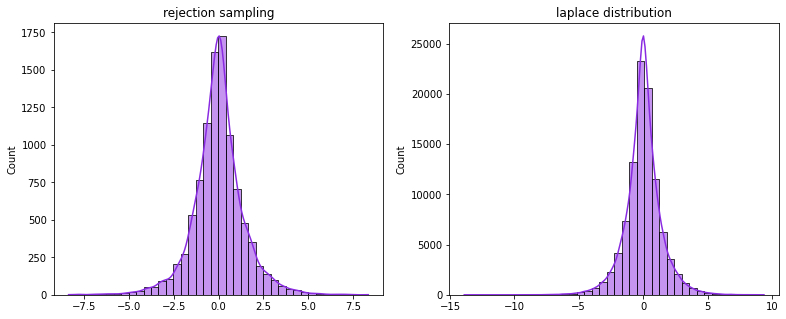

In [299]:
plt.figure(figsize = (13,5))

plt.subplot(121)
sns.histplot(rejection_sampling(10**5,10), bins = 40,kde = True, color ='blueviolet');
plt.title('rejection sampling')

plt.subplot(122)
sns.histplot(lap2, bins = 40,kde = True,color ='blueviolet');
plt.title('laplace distribution')

# Markov Chain Monte carlo method(MCMC)

In the Rejection sampling method, it is impossible to generate random numbers when the upper boundary L is not known. MCMC method is an effective solution to this problem. MCMC method uses the concept of a stochastic process (Markov chain in this case). In this case, the generation of i-th sample $x_i$ depends on the previous sample $x_{i-1}$. ${x_1, x_2, …,x_n}$ with this concept is called a Markov chain. Here, I introduce one of the MCMC methods, the Metropolis-Hastings method.<br>

The process in this method is similar to Rejection sampling. But here, a proxy distribution density function is represented by a conditional probability $q(x|x_i)$, and the evaluation index v is generated from a uniform distribution on [0,1].<br>

First, we generate a random number x’ from a proxy distribution $q(x|x_i)$. This x’ is called a proposal point.<br>
Next, generate a random number v from a uniform distribution on [0, 1]. This v will be used to evaluate the proposal point, whether to be fine considering generated from p(x).<br>
If $v ≤ p(x’)q(x_i|x’)/(p(x_i)q(x’|x_i))$, then x’ is accepted as a random number generated by p(x), else, x’ is rejected.<br>
The algorithm in generating n random numbers with Rejection Sampling is

Now use MCMC to calculate the variance of Laplace Distribution.

In [362]:
def P(x, l = 1):
    return 0.5*np.exp(-abs(x))

In [365]:
def metropolice(n,la):
  x0 = 0
  x = x0
  sample_x = []
  for i in range(n):
    x_candidate = np.random.normal(x,1)
    acceptence = P(x_candidate,la)/P(x,la)
    if np.random.uniform(0, 1) < acceptence:
      x = x_candidate
      sample_x.append(x)

  return np.array(sample_x)

In [367]:
samp = metropolice(10**5,1)
lap3 = np.random.laplace(0,1,10**5)

In [371]:
variance_s3 = np.var(samp)
lap3 = np.random.laplace(0,1,10**5)
variance_l3 = np.var(lap3)
print('variance with MCMC method :',variance_s3)
print('variance with directly used of Laplace distribution :', variance_l3)

variance with MCMC method : 2.0859438923517426
variance with directly used of Laplace distribution : 2.004671309478583


Text(0.5, 1.0, 'laplace distribution')

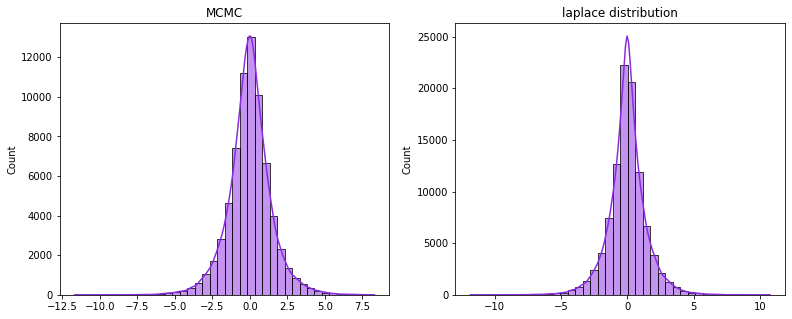

In [372]:
plt.figure(figsize = (13,5))

plt.subplot(121)
sns.histplot(samp, bins = 40,kde = True, color ='blueviolet');
plt.title('MCMC')

plt.subplot(122)
sns.histplot(lap3, bins = 40,kde = True,color ='blueviolet');
plt.title('laplace distribution')